In [185]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report

In this phase, I will:
- Load and explore the dataset
- Check missing values
- Detect outliers (using boxplots and IQR method)
- Summarize the main data quality issues


### Download and take a look at the Data 

In [186]:
booking = pd.read_csv('hotel_bookings.csv')

In [187]:
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


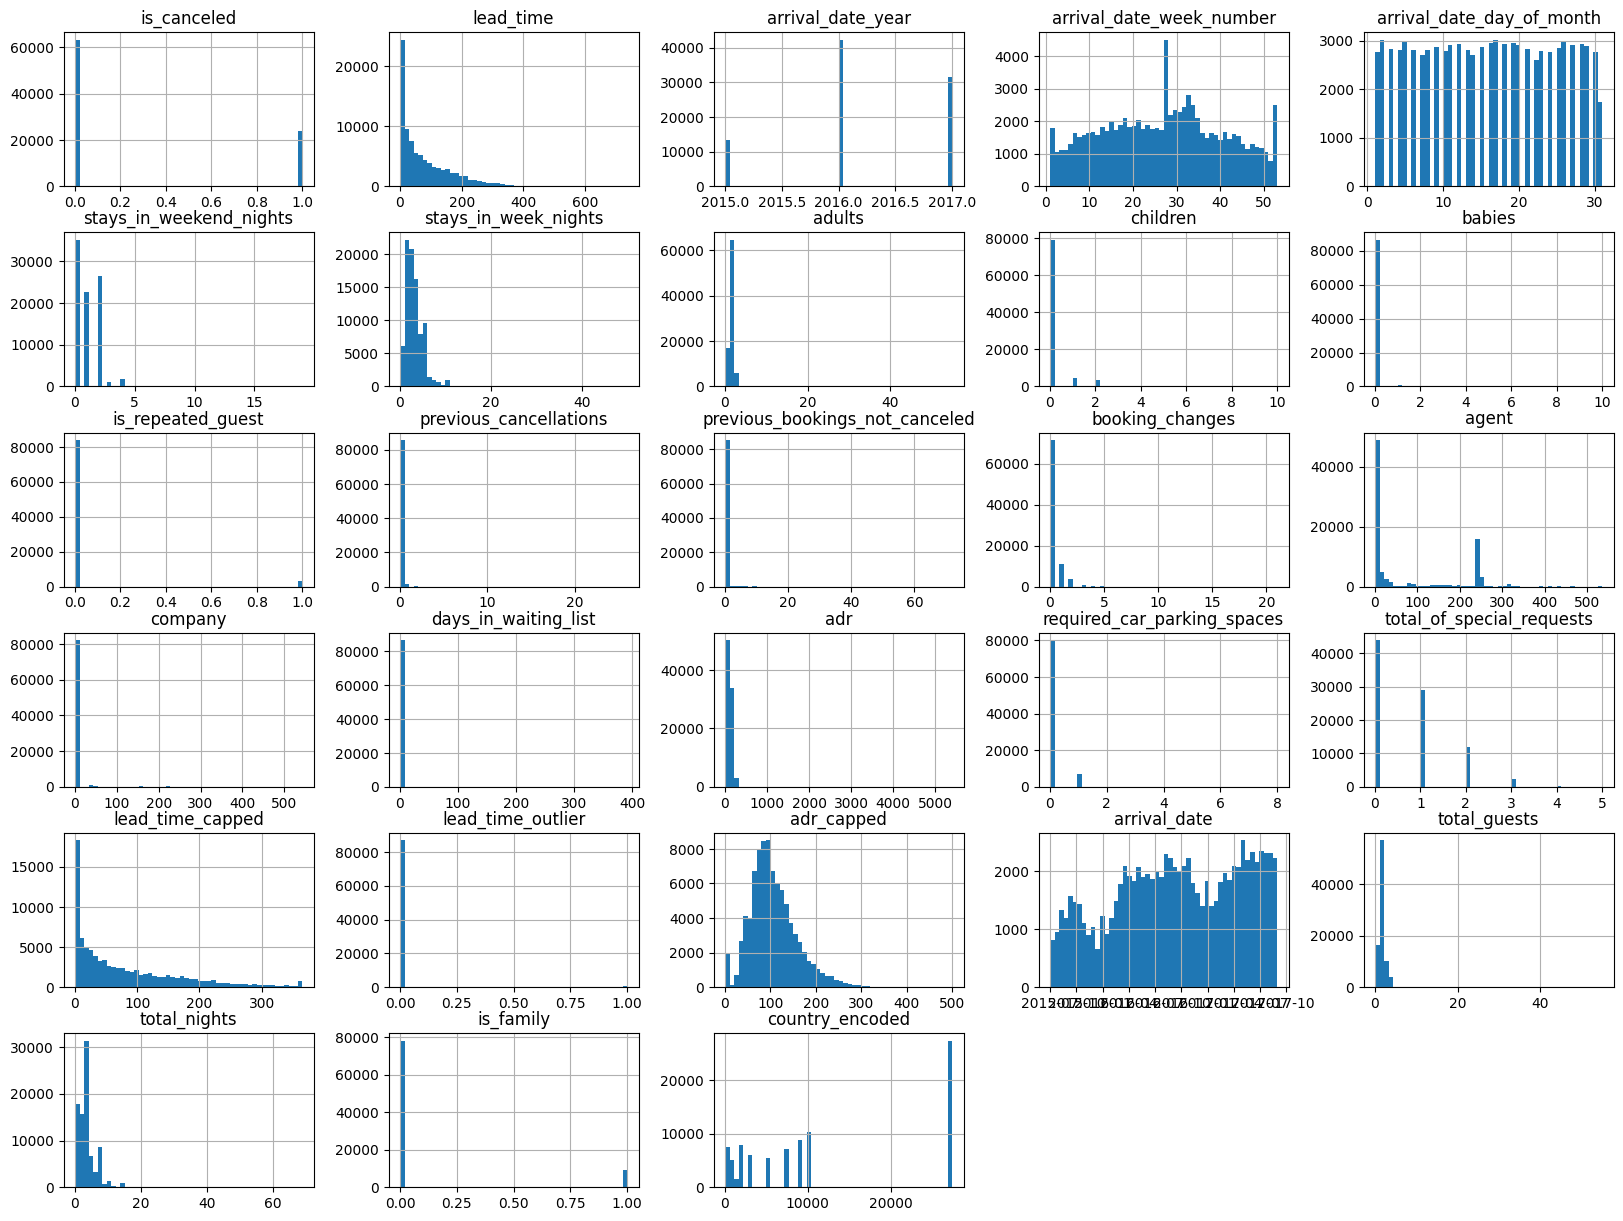

In [251]:
booking.hist(bins=50,figsize=(20,15))
plt.show()

In [188]:
booking.shape

(119390, 32)

In [189]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [190]:
booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [191]:
booking.nunique() # number of unique values in each column

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

### Missing Values
I check how many values are missing in each column (absolute and percentage). 
I also visualize the missingness pattern using `missingno`.


In [192]:
print(booking.isnull().sum()) # the number of missing values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [193]:
print(booking.isnull().mean() * 100)  # the percentage of the missing values 

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

<Axes: >

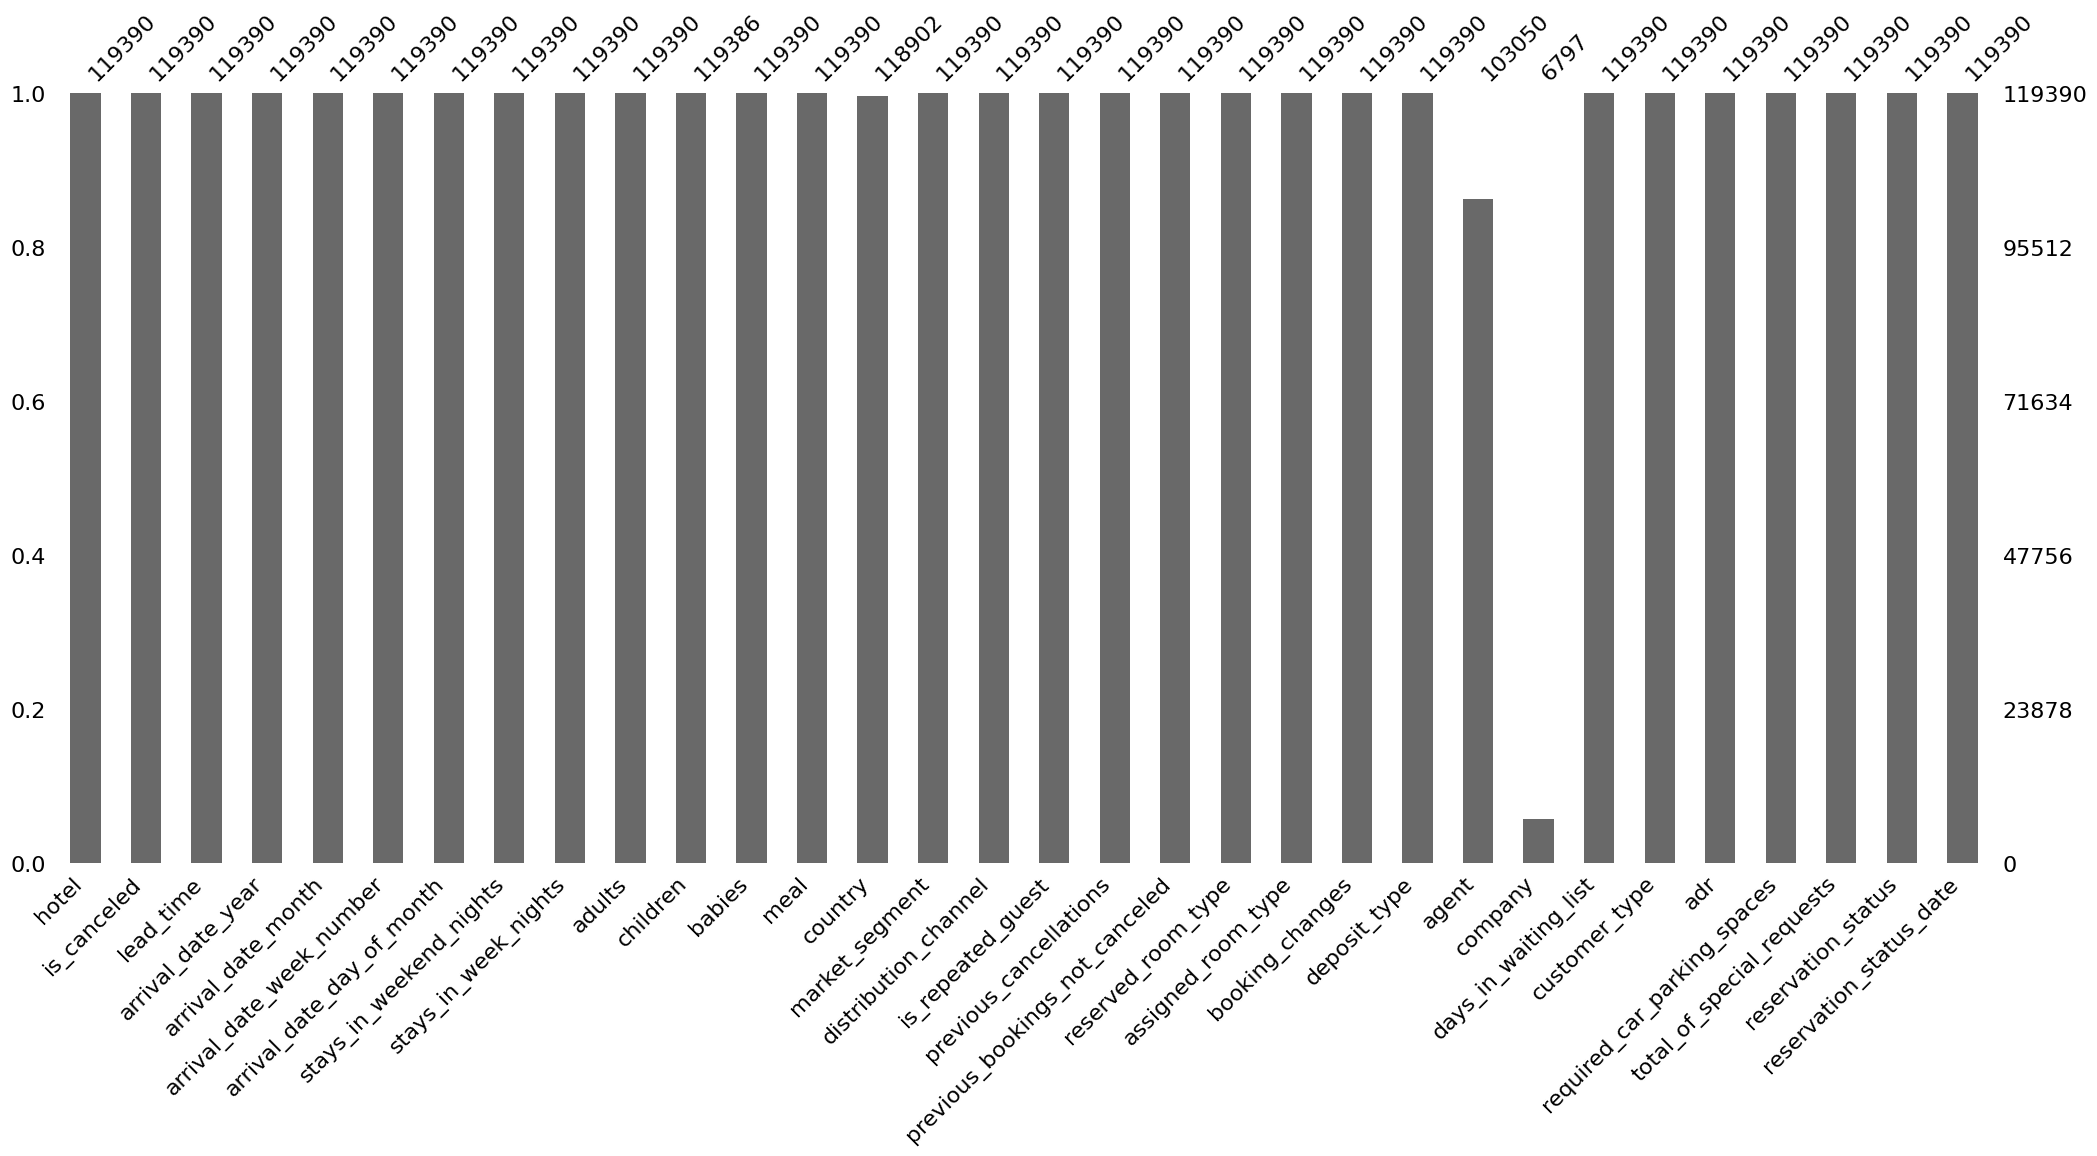

In [194]:
import missingno as msno
msno.bar(booking)

<Axes: >

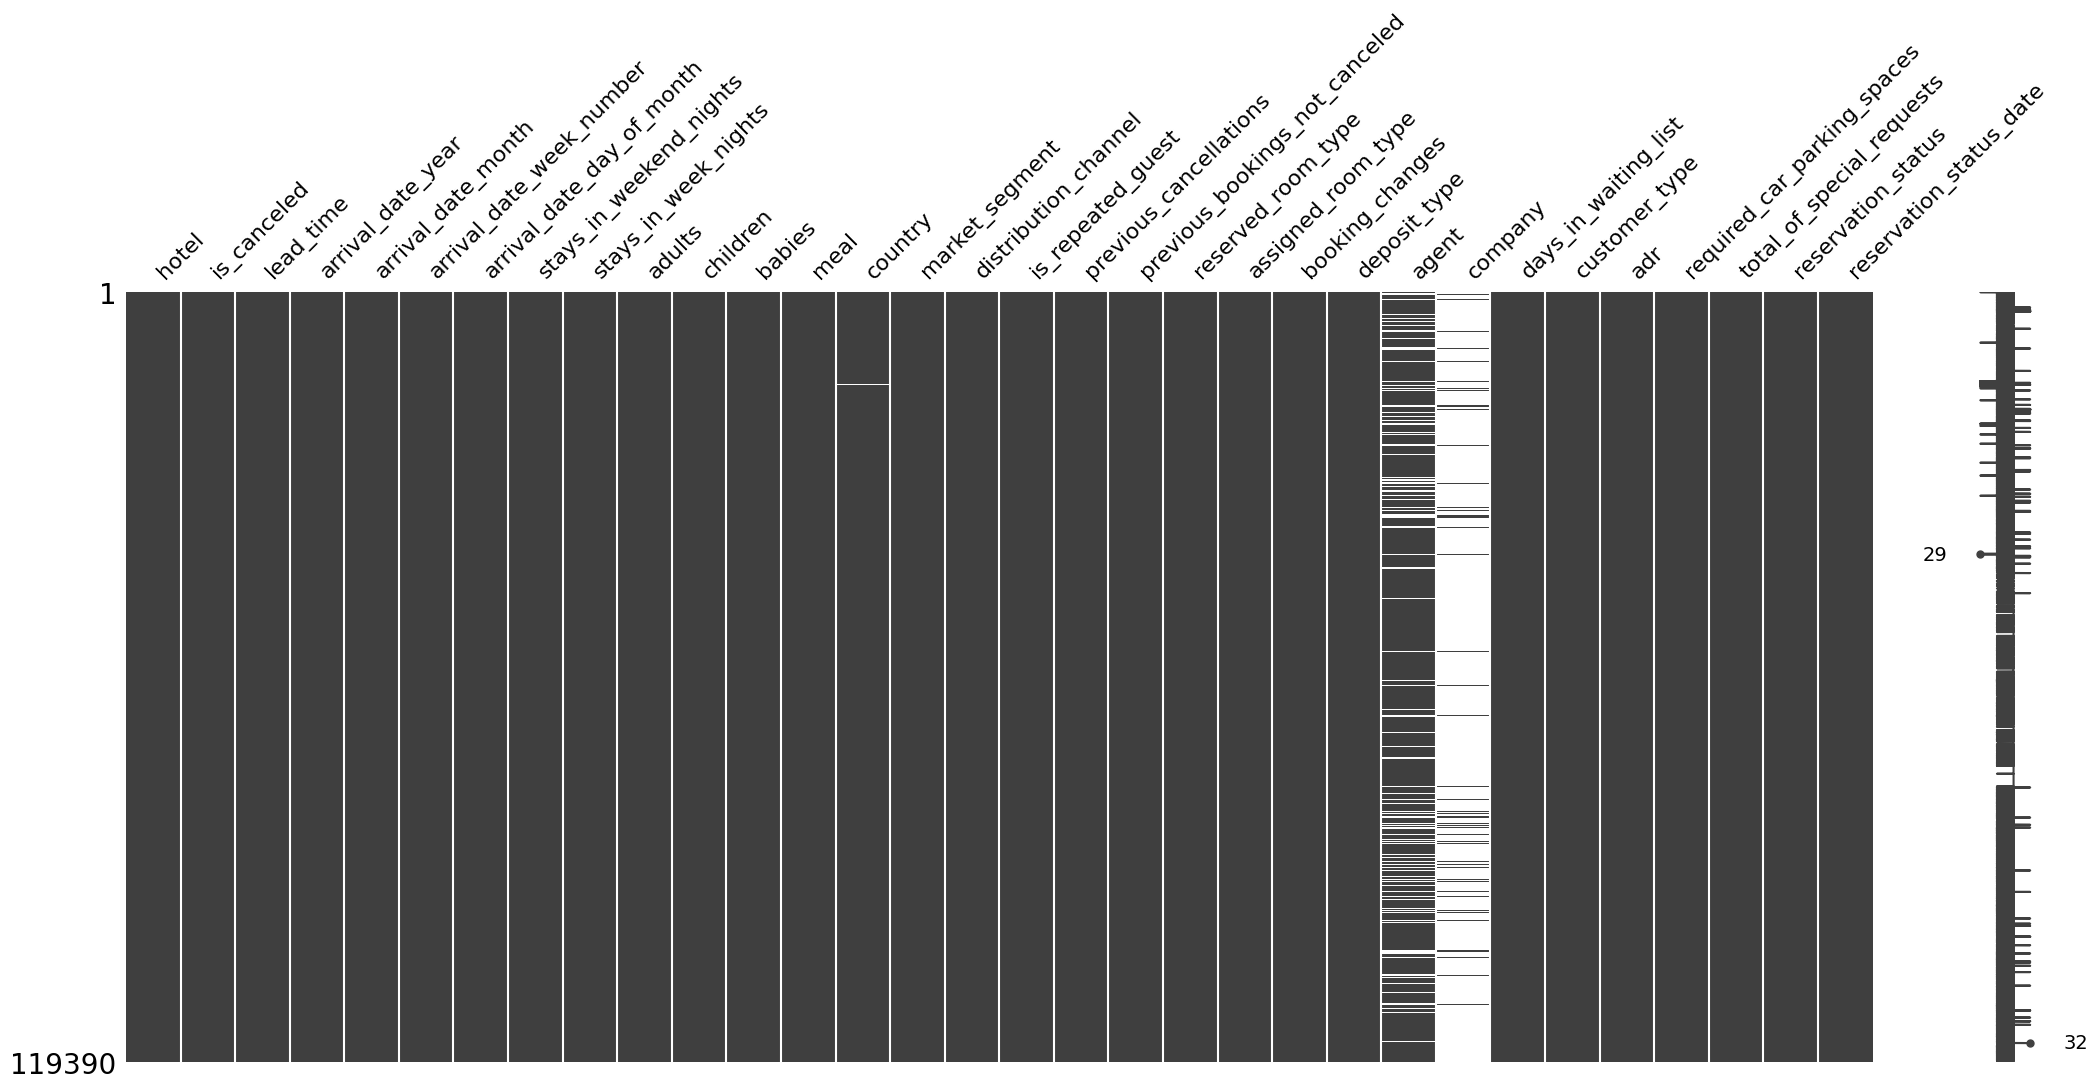

In [195]:
msno.matrix(booking)

I visualize the correlations between numeric features to see how they relate to each other and identify any strong associations.

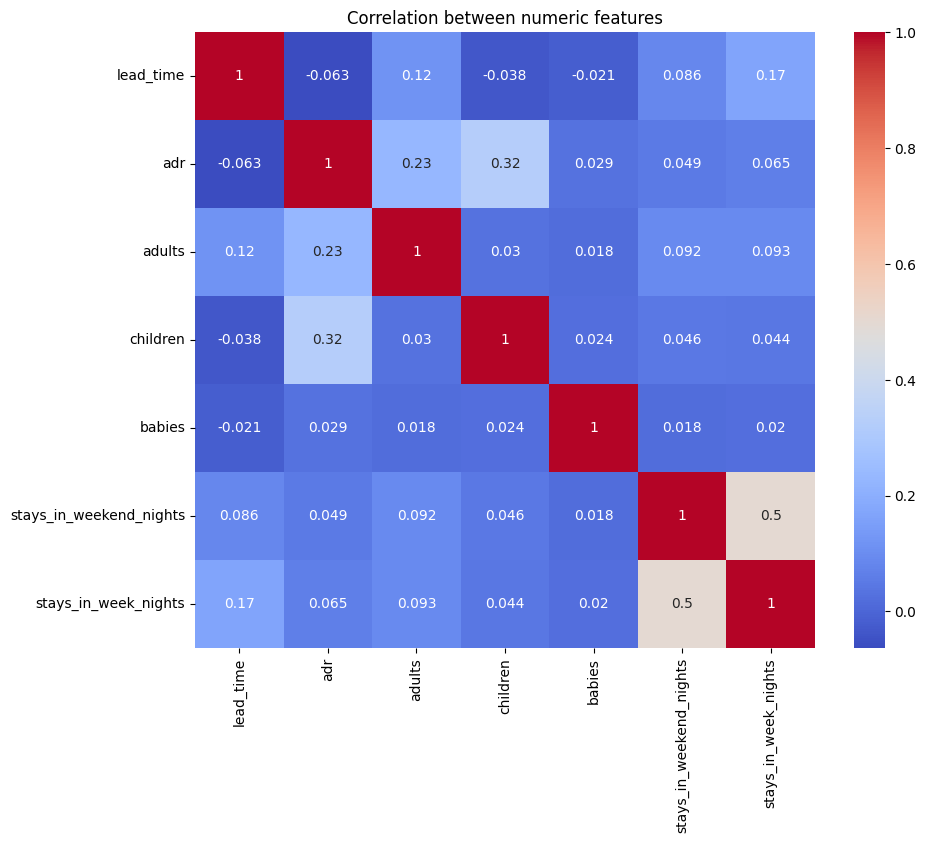

In [196]:
numeric_cols = ['lead_time','adr','adults','children','babies','stays_in_weekend_nights','stays_in_week_nights']
plt.figure(figsize=(10,8))
sns.heatmap(booking[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between numeric features")
plt.show()

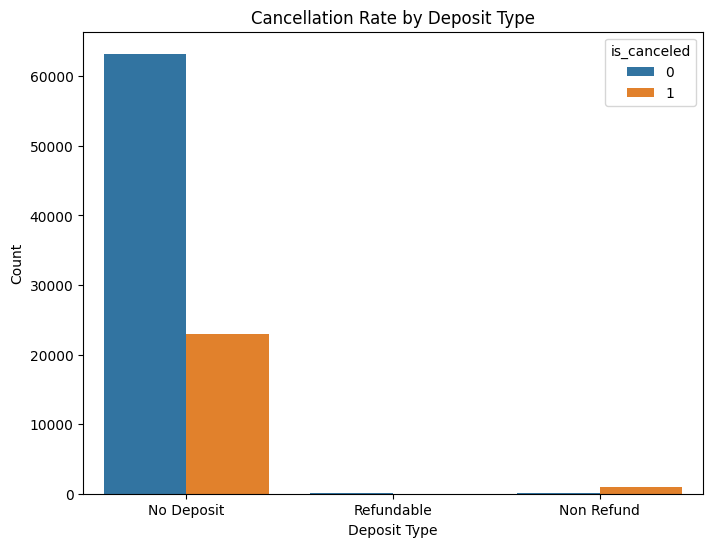

In [252]:
plt.figure(figsize=(8,6))
sns.countplot(x="deposit_type", hue="is_canceled", data=booking)
plt.title("Cancellation Rate by Deposit Type")
plt.ylabel("Count")
plt.xlabel("Deposit Type")
plt.show()


### Outlier Detection
We use two methods to detect outliers in key numerical columns (`adr` and `lead_time`):
1. Boxplots  
2. Interquartile Range (IQR) calculations


#### Boxplots Method

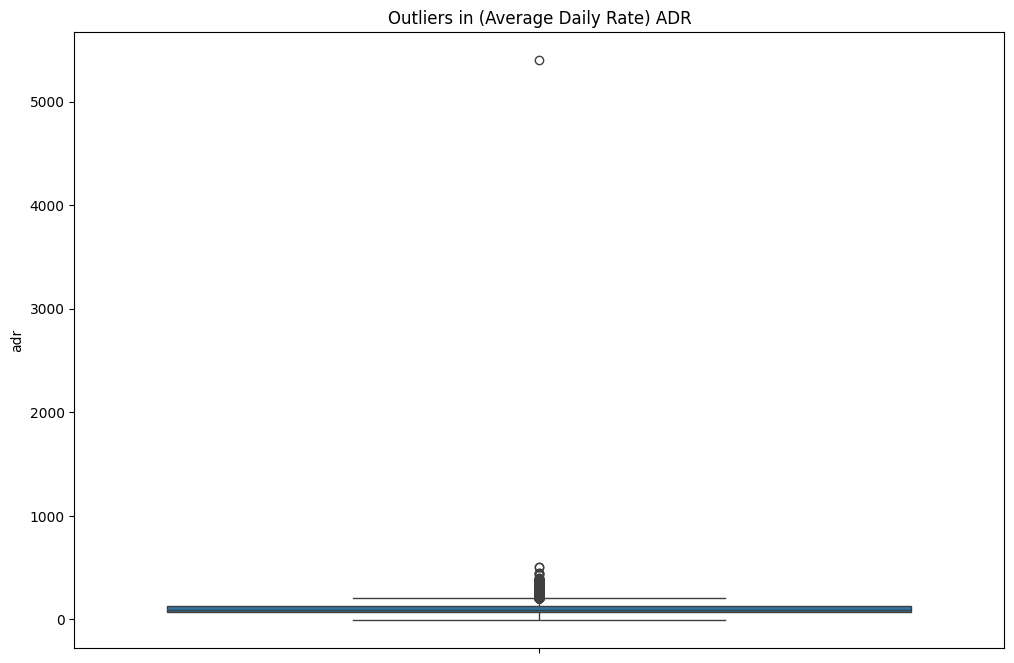

In [197]:
plt.figure(figsize=(12,8))
sns.boxplot(booking['adr'])
plt.title("Outliers in (Average Daily Rate) ADR")
plt.show()

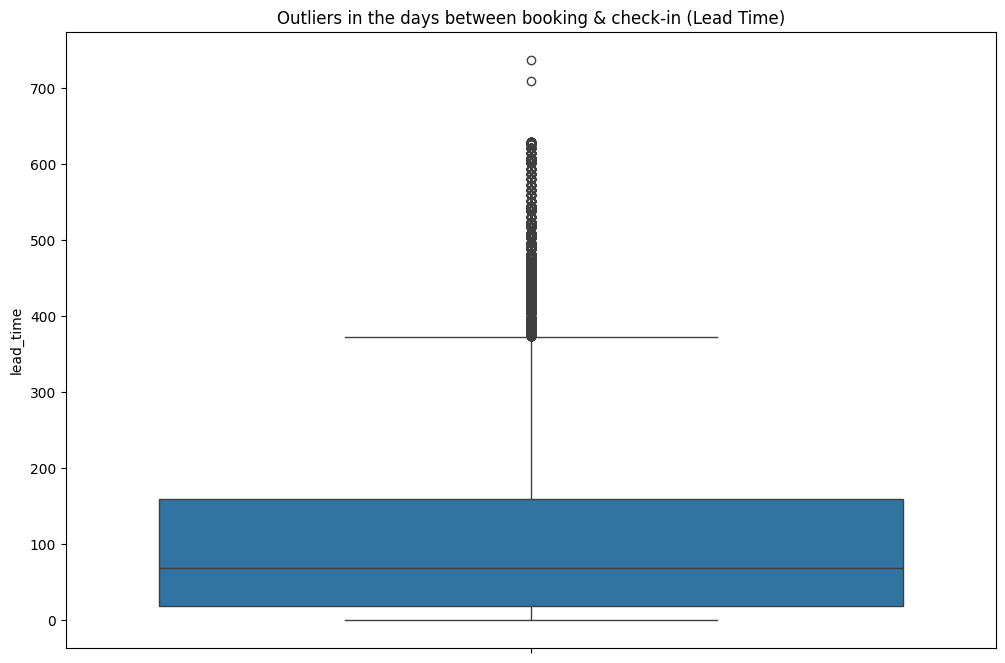

In [198]:
plt.figure(figsize=(12,8))
sns.boxplot(booking['lead_time'])
plt.title("Outliers in the days between booking & check-in (Lead Time)")
plt.show()

####  Interquartile Range (IQR) Method


<br>  The IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1): <br> 
<center>    IQR = Q3 - Q1    <center>

To define the outlier
<center> Upper bound = Q3 + 1.5 * IQR <center>
Lower bound = Q1 - 1.5 * IQR

In [199]:
print("ADR outlier calculations")
Q1 = booking['adr'].quantile(0.25)
Q3 = booking['adr'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)


ADR outlier calculations
IQR: 56.709999999999994
Upper Bound: 211.065
Lower Bound: -15.774999999999991


In [200]:
ADR_outliers = booking[(booking['adr'] > upper_bound) | (booking['adr'] < lower_bound)]
print("Number of outliers in ADR:", ADR_outliers.shape)

Number of outliers in ADR: (3793, 32)


In [201]:
print("ADR Outlier Values:")
print("Minimum ADR outlier:", ADR_outliers['adr'].min())
print("Maximum ADR outlier:", ADR_outliers['adr'].max())

ADR Outlier Values:
Minimum ADR outlier: 211.08
Maximum ADR outlier: 5400.0


In [202]:
Max_5 = booking.sort_values(by='adr',ascending=False).head(5)
print(Max_5[['hotel', 'is_canceled', 'lead_time','adr']])

               hotel  is_canceled  lead_time     adr
48515     City Hotel            1         35  5400.0
111403    City Hotel            0          0   510.0
15083   Resort Hotel            0          1   508.0
103912    City Hotel            0         81   451.5
13142   Resort Hotel            1        378   450.0


In [203]:
print("Lead Time outlier calculations")
Q1 = booking['lead_time'].quantile(0.25)
Q3 = booking['lead_time'].quantile(0.75)
IQR = Q3 - Q1 
print("IQR:" , IQR)
upper_bound = Q3 + 1.5 * IQR 
lower_bound = Q1 - 1.5 * IQR
print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Lead Time outlier calculations
IQR: 142.0
Upper Bound: 373.0
Lower Bound: -195.0


In [204]:
leadTime_outliers = booking[(booking['lead_time'] > upper_bound ) | (booking['lead_time'] < lower_bound)]
print("Number of outliers in Lead Time:",leadTime_outliers.shape)

Number of outliers in Lead Time: (3005, 32)


In [205]:
print("Lead Time Outlier Values:")
print("Minimum Lead Time outlier:", leadTime_outliers['lead_time'].min())
print("Maximum Lead Time outlier:", leadTime_outliers['lead_time'].max())


Lead Time Outlier Values:
Minimum Lead Time outlier: 374
Maximum Lead Time outlier: 737


In [206]:
Max_20 = booking.sort_values(by='lead_time',ascending=False).head(20)
print(Max_20[['hotel', 'is_canceled', 'adr','lead_time',]])

              hotel  is_canceled   adr  lead_time
1      Resort Hotel            0   0.0        737
4182   Resort Hotel            0  68.0        709
65241    City Hotel            1  62.0        629
65240    City Hotel            1  62.0        629
65242    City Hotel            1  62.0        629
65244    City Hotel            1  62.0        629
65250    City Hotel            1  62.0        629
65249    City Hotel            1  62.0        629
65245    City Hotel            1  62.0        629
65235    City Hotel            1  59.0        629
65253    City Hotel            1  62.0        629
65238    City Hotel            1  62.0        629
65237    City Hotel            1  62.0        629
65254    City Hotel            1  62.0        629
65239    City Hotel            1  62.0        629
65251    City Hotel            1  62.0        629
65243    City Hotel            1  62.0        629
65252    City Hotel            1  62.0        629
65231    City Hotel            1  59.0        629


In [207]:
# the percentage of outliers
adr_outlier_percentage = (len(ADR_outliers) / len(booking)) * 100
lead_time_outlier_percentage = (len(leadTime_outliers) / len(booking)) * 100

print(f"ADR outliers represent {adr_outlier_percentage:.2f}% of the data")
print(f"Lead time outliers represent {lead_time_outlier_percentage:.2f}% of the data")

ADR outliers represent 3.18% of the data
Lead time outliers represent 2.52% of the data


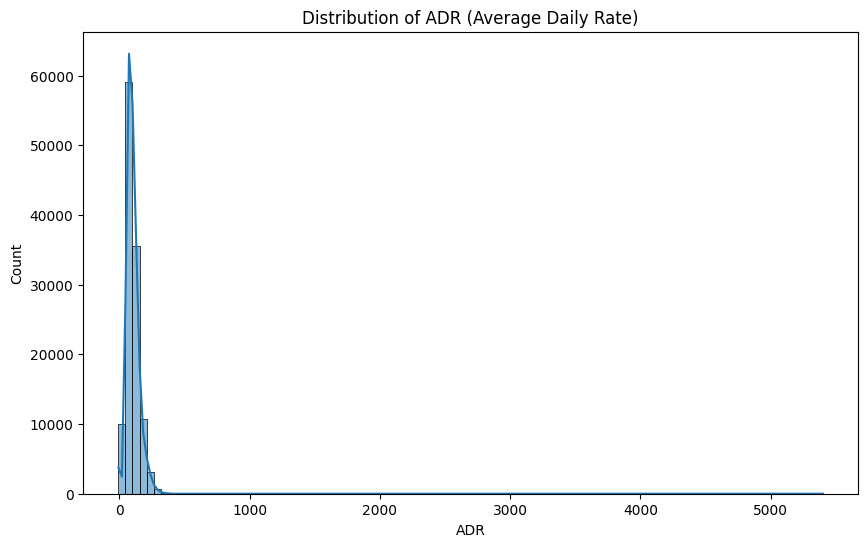

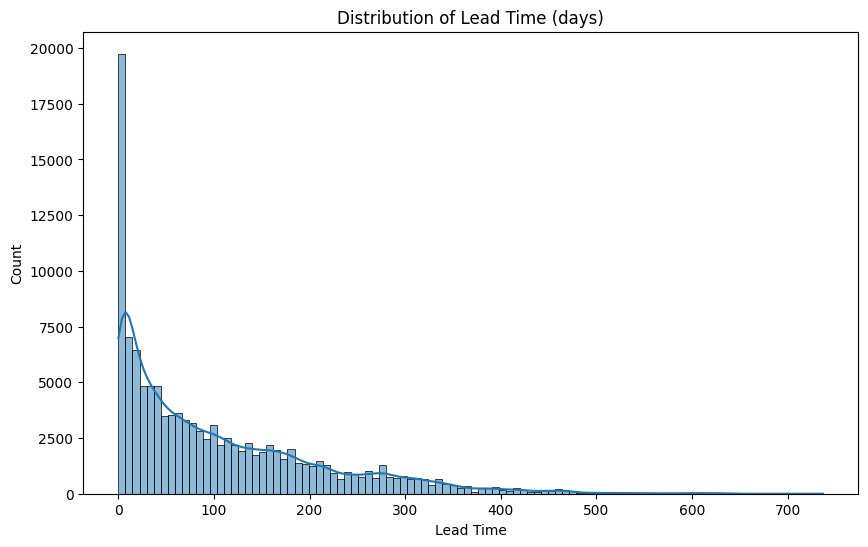

In [208]:
# ADR Distribution
plt.figure(figsize=(10,6))
sns.histplot(booking['adr'], bins=100, kde=True)
plt.title("Distribution of ADR (Average Daily Rate)")
plt.xlabel("ADR")
plt.ylabel("Count")
plt.show()

# Lead Time Distribution
plt.figure(figsize=(10,6))
sns.histplot(booking['lead_time'], bins=100, kde=True)
plt.title("Distribution of Lead Time (days)")
plt.xlabel("Lead Time")
plt.ylabel("Count")
plt.show()


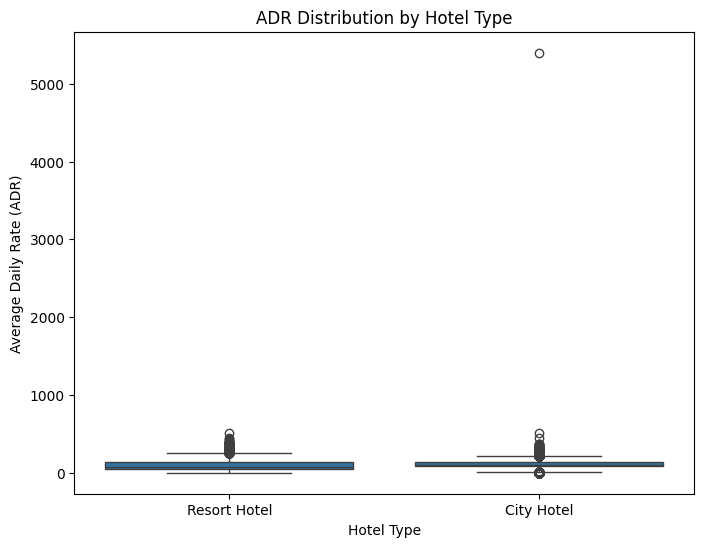

In [255]:
#Distribution of ADR by Hotel Type
plt.figure(figsize=(8,6))
sns.boxplot(x="hotel", y="adr", data=booking)
plt.title("ADR Distribution by Hotel Type")
plt.ylabel("Average Daily Rate (ADR)")
plt.xlabel("Hotel Type")
plt.show()


## The main data quality issues:
##### some columns have missing values:
- `children: 4`
- `country: 488`
- `agent: 16340` 
- `company: 112593`
##### `adr` column has extreme outliers (Max = 5400.0), which is unrealistic with `3.18%` of the data
##### `lead_time` also shows extreme outliers (values > 500 days) with `2.52%` of the data


## Phase 2: Data Cleaning

In this phase, I will : 
- Handle the Missing Values
- Remove Duplicated Rows
-  Handle Outliers
- Fix Data Types

### Handle Missing Values


In [209]:
booking['company'] = booking['company'].fillna(0)
booking['agent'] = booking['agent'].fillna(0)
booking['country'] = booking['country'].fillna('Unknown')
booking['children'] = booking['children'].fillna(booking['children'].mode()[0])
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Remove the Row that have ADR with Negative Value 

In [210]:
booking[booking["adr"] < 0].shape
booking = booking[booking["adr"] >= 0]  
booking.shape

(119389, 32)

In [211]:
booking.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### Remove Duplicates

In [212]:
print("The Number of Duplicated Rows: ",booking.duplicated().sum())

The Number of Duplicated Rows:  31994


In [213]:
print("Shape before removing duplicates:", booking.shape)
booking.drop_duplicates(inplace=True)
booking.reset_index(drop=True, inplace=True)
print("Shape after removing duplicates:", booking.shape)


Shape before removing duplicates: (119389, 32)
Shape after removing duplicates: (87395, 32)


### Handle Outliers

#### Lead Time 

We capped the `lead_time` column at **365 days** and created an outlier flag because:

- Some bookings have **unrealistically long lead times**, for example, over 700 days, which are very unlikely in practice
- Such extreme values are **rare** but can **significantly skew summary statistics**, like the mean and standard deviation, and can **negatively affect model performance** if used in predictive modeling
- By **capping at 365**, we align the data with **realistic business rules**: hotels generally do not accept bookings more than a year in advance **(max booking window = 1 year)**
- The capping method **preserves all rows** while limiting the effect of extreme values, instead of deleting data which might still be informative
- Creating a **lead_time_outlier flag** allows us to **identify and analyze these extreme cases** separately, which can be useful for further insights or special handling in modeling
- Overall, this approach ensures that the dataset is **clean, realistic, and robust** for both analysis and predictive modeling


In [214]:
booking['lead_time_capped'] = booking['lead_time'].clip(upper=365)
# Create an outlier flag (1 if original lead_time > 365, else 0)
booking['lead_time_outlier'] = (booking['lead_time'] > 365).astype(int)

print("Lead Time values after capping at 365:")
print(booking['lead_time_capped'].describe())

print("\nLead Time Outlier Flag counts:")
print(booking['lead_time_outlier'].value_counts())

Lead Time values after capping at 365:
count    87395.000000
mean        79.438995
std         84.220947
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        365.000000
Name: lead_time_capped, dtype: float64

Lead Time Outlier Flag counts:
lead_time_outlier
0    86830
1      565
Name: count, dtype: int64


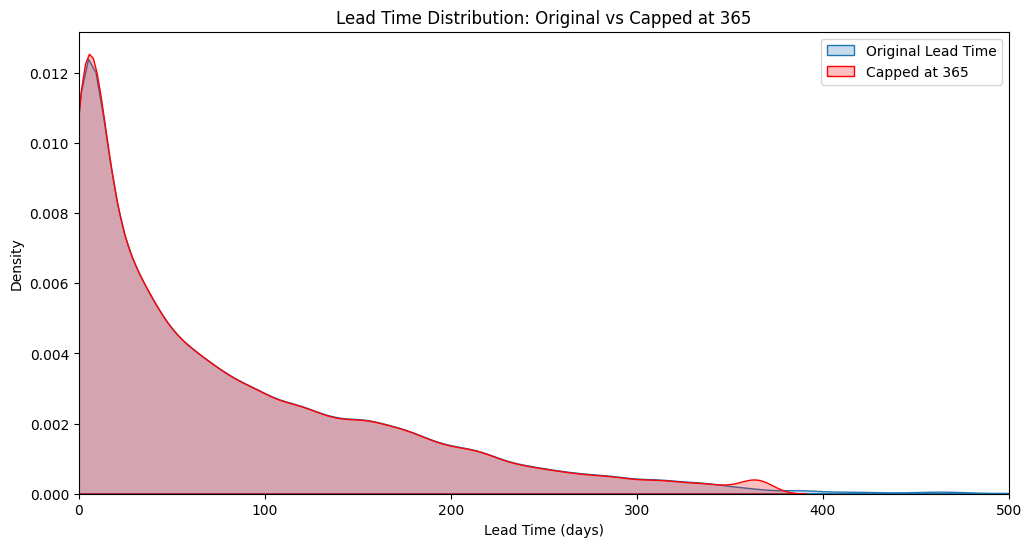

In [215]:
plt.figure(figsize=(12,6))
sns.kdeplot(booking['lead_time'], label="Original Lead Time", fill=True)
sns.kdeplot(booking['lead_time_capped'], label="Capped at 365", fill=True, color="red")
plt.xlim(0, 500)
plt.xlabel("Lead Time (days)")
plt.ylabel("Density")
plt.title("Lead Time Distribution: Original vs Capped at 365")
plt.legend()
plt.show()

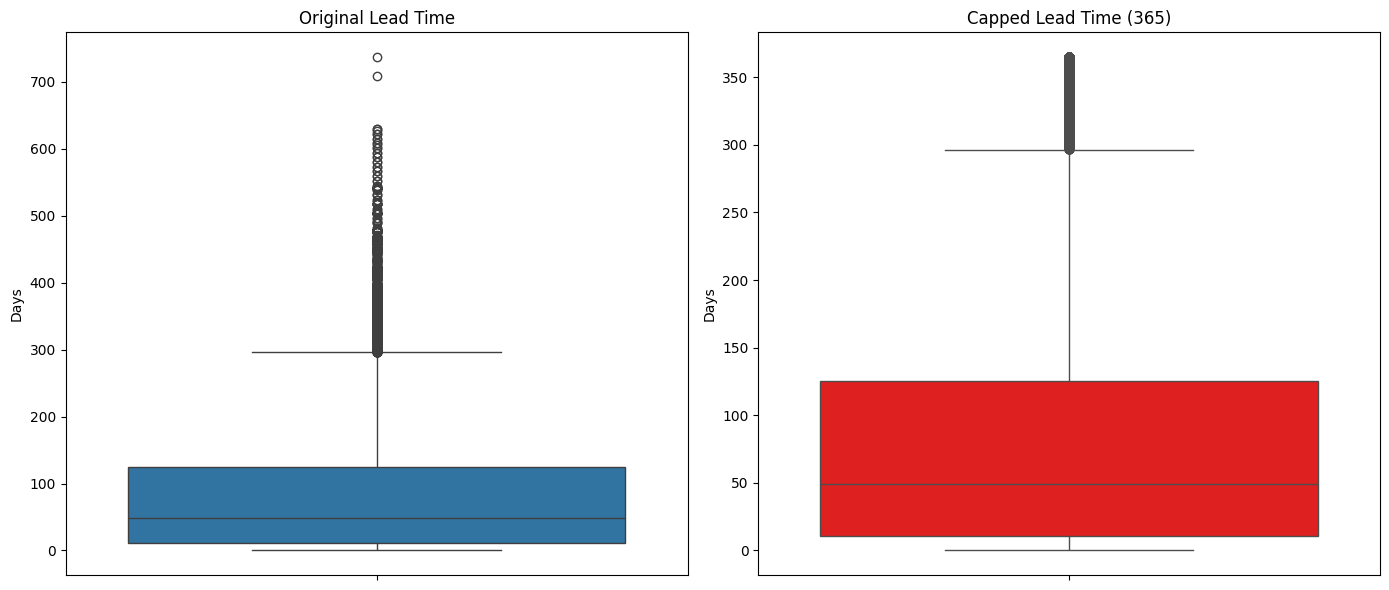

In [216]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(y=booking['lead_time'], ax=axes[0])
axes[0].set_title("Original Lead Time")
axes[0].set_ylabel("Days")

sns.boxplot(y=booking['lead_time_capped'], ax=axes[1], color="red")
axes[1].set_title("Capped Lead Time (365)")
axes[1].set_ylabel("Days")

plt.tight_layout()
plt.show()

#### ADR (Average Daily Rate)

We capped the `ADR` column at **500** because:

- Some bookings have **extremely high ADR values**, e.g., 5400, which are unrealistic compared to the majority of the data
- These extreme values are **rare**, but if left as-is, they can **skew statistical measures** like the mean and standard deviation and **affect model predictions**
- Capping at 500 ensures that the dataset remains **realistic and representative** of typical bookings & only 3 values are above `500`
- This method **preserves all rows** while limiting the influence of extreme ADR values, avoiding data loss 
- It helps maintain the **integrity of analyses and predictive modeling**, while extreme cases can still be observed if needed for further investigation 
- Overall, capping ADR makes the dataset **more robust, reliable, and aligned with business expectations**


In [217]:
booking['adr_capped'] = booking['adr'].clip(upper=500)
print(booking['adr_capped'].describe())

count    87395.000000
mean       106.282263
std         52.032497
min          0.000000
25%         72.000000
50%         98.100000
75%        134.000000
max        500.000000
Name: adr_capped, dtype: float64


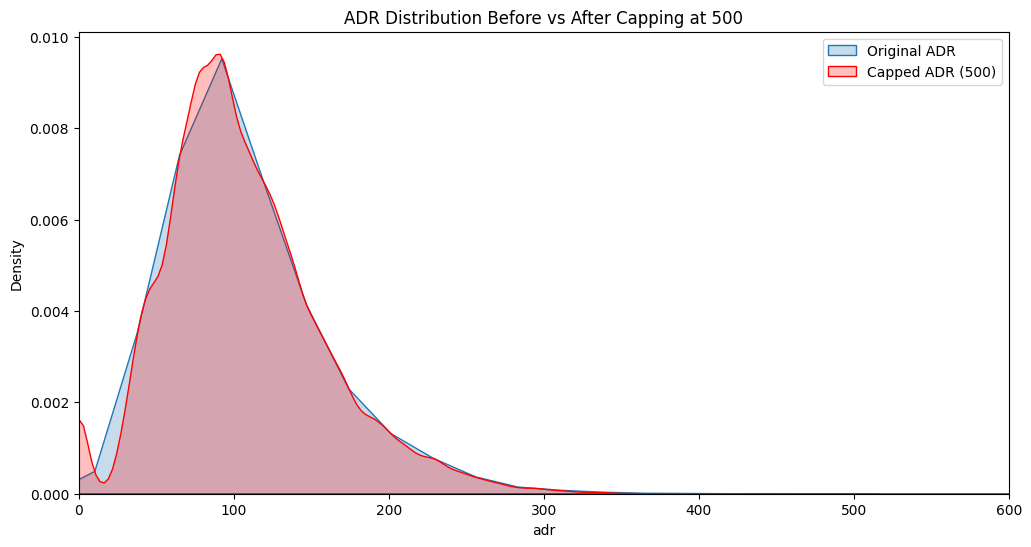

In [218]:
plt.figure(figsize=(12,6))
sns.kdeplot(booking['adr'], label="Original ADR", fill=True)
sns.kdeplot(booking['adr_capped'], label="Capped ADR (500)", fill=True, color="red")
plt.xlim(0,600) 
plt.legend()
plt.title("ADR Distribution Before vs After Capping at 500")
plt.show()


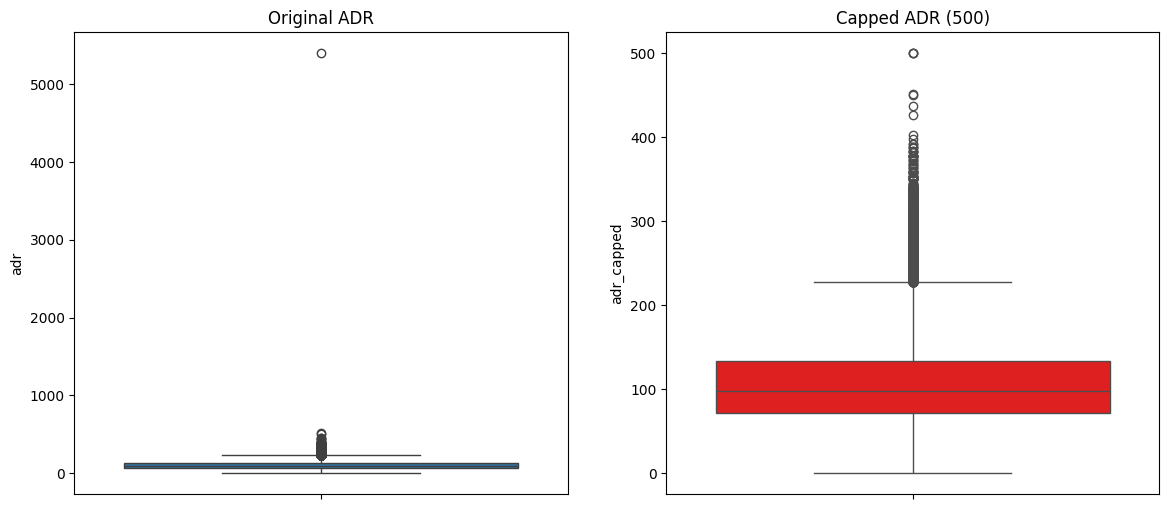

In [219]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.boxplot(y=booking['adr'], ax=axes[0])
axes[0].set_title("Original ADR")
sns.boxplot(y=booking['adr_capped'], ax=axes[1], color="red")
axes[1].set_title("Capped ADR (500)")
plt.show()


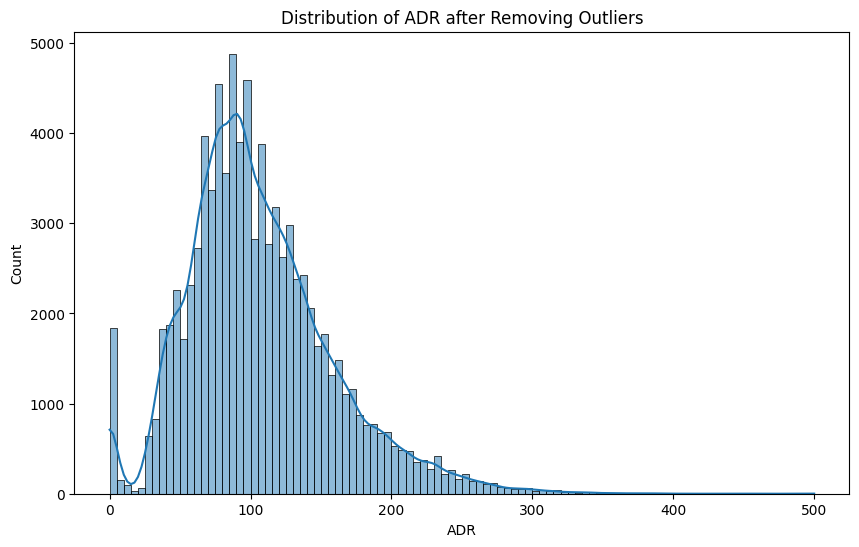

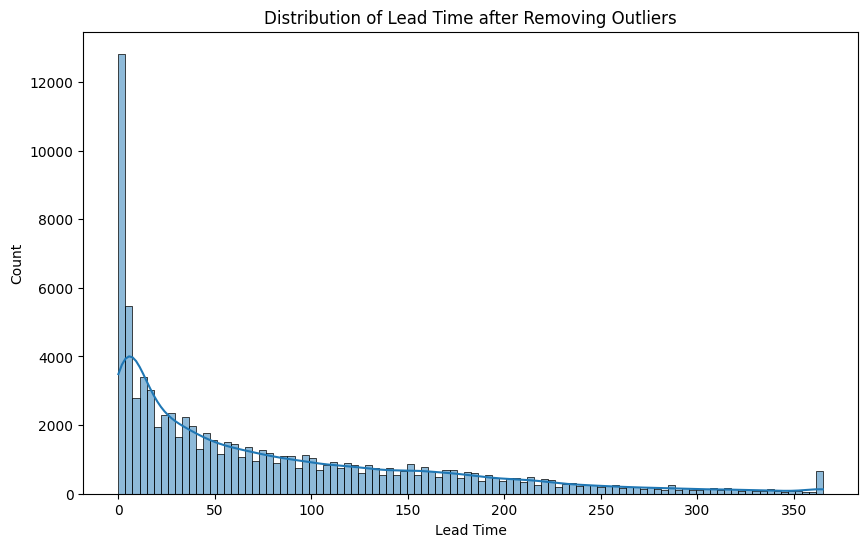

In [220]:
# ADR Capped Distribution
plt.figure(figsize=(10,6))
sns.histplot(booking['adr_capped'], bins=100, kde=True)
plt.title("Distribution of ADR after Removing Outliers")
plt.xlabel("ADR")
plt.ylabel("Count")
plt.show()

# Lead Time Capped Distribution
plt.figure(figsize=(10,6))
sns.histplot(booking['lead_time_capped'], bins=100, kde=True)
plt.title("Distribution of Lead Time after Removing Outliers")
plt.xlabel("Lead Time")
plt.ylabel("Count")
plt.show()

#### Fix Data Type

In [221]:
booking['reservation_status_date'] = pd.to_datetime(booking['reservation_status_date'])
booking['reservation_status_date'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 87395 entries, 0 to 87394
Series name: reservation_status_date
Non-Null Count  Dtype         
--------------  -----         
87395 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 682.9 KB


In [222]:
booking['arrival_date'] = pd.to_datetime(
    booking['arrival_date_year'].astype(str) + '-' +
    booking['arrival_date_month'] + '-' +
    booking['arrival_date_day_of_month'].astype(str)
)
booking['arrival_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 87395 entries, 0 to 87394
Series name: arrival_date
Non-Null Count  Dtype         
--------------  -----         
87395 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 682.9 KB


In [223]:
print(booking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87395 non-null  object        
 1   is_canceled                     87395 non-null  int64         
 2   lead_time                       87395 non-null  int64         
 3   arrival_date_year               87395 non-null  int64         
 4   arrival_date_month              87395 non-null  object        
 5   arrival_date_week_number        87395 non-null  int64         
 6   arrival_date_day_of_month       87395 non-null  int64         
 7   stays_in_weekend_nights         87395 non-null  int64         
 8   stays_in_week_nights            87395 non-null  int64         
 9   adults                          87395 non-null  int64         
 10  children                        87395 non-null  float64       
 11  ba

In [224]:
booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,lead_time_capped,lead_time_outlier,adr_capped,arrival_date
count,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,...,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395,87395.000000,87395.000000,87395.000000,87395
mean,0.274901,79.890051,2016.210287,26.838526,15.815665,1.005229,2.625356,1.875794,0.138635,0.010824,...,11.016935,0.749574,106.338536,0.084227,0.698575,2016-08-31 03:40:55.348704256,79.438995,0.006465,106.282263,2016-09-15 00:17:37.817953280
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00,0.000000,0.000000,0.000000,2015-07-01 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,72.000000,0.000000,0.000000,2016-03-18 00:00:00,11.000000,0.000000,72.000000,2016-04-01 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,98.100000,0.000000,0.000000,2016-09-08 00:00:00,49.000000,0.000000,98.100000,2016-09-20 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,134.000000,0.000000,1.000000,2017-03-05 00:00:00,125.000000,0.000000,134.000000,2017-04-01 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00,365.000000,1.000000,500.000000,2017-08-31 00:00:00
std,0.446467,86.051937,0.686101,13.674531,8.835121,1.031877,2.053564,0.626504,0.455874,0.113597,...,54.047781,10.015788,55.012947,0.281535,0.831947,NaN,84.220947,0.080145,52.032497,NaN


In [225]:
booking.to_csv("hotel_bookings_cleaned.csv", index=False)

## Phase 3: Feature Engineering & Preprocessing 

### In this phase, I will :
1. Create new features
2. Drop irrelevant columns
3. Apply **One-Hot Encoding** for low-cardinality categorical variables
4. Apply **Frequency Encoding** for high-cardinality feature (country)
5. Save the processed dataset
6. Split the data into training and testing sets

### Creat New Features
I engineered new features that provide more information to the model:

- `Total Guests` = adults + children + babies → captures the actual group size

- `Total Nights` = weekend nights + week nights → captures the full stay duration

- `Is Family` = 1 if the booking includes children or babies, else 0 → helps distinguish family vs. non-family bookings

In [226]:
booking['total_guests'] = booking['adults'] + booking['babies'] + booking['children']
booking['total_guests']

0        2.0
1        2.0
2        1.0
3        1.0
4        2.0
        ... 
87390    2.0
87391    3.0
87392    2.0
87393    2.0
87394    2.0
Name: total_guests, Length: 87395, dtype: float64

In [227]:
booking['total_nights'] = booking['stays_in_weekend_nights'] + booking['stays_in_week_nights']
booking['total_nights']

0        0
1        0
2        1
3        1
4        2
        ..
87390    7
87391    7
87392    7
87393    7
87394    9
Name: total_nights, Length: 87395, dtype: int64

In [228]:
#booking['is_family'] = booking[['children', 'babies']].apply(lambda x: 1 if (x['children'] > 0 or x['babies'] > 0) else 0, axis=1)
booking['is_family'] = ((booking['children'] > 0) | (booking['babies'] > 0)).astype(int)
booking['is_family']

0        0
1        0
2        0
3        0
4        0
        ..
87390    0
87391    0
87392    0
87393    0
87394    0
Name: is_family, Length: 87395, dtype: int64

In [229]:
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,lead_time_capped,lead_time_outlier,adr_capped,arrival_date,total_guests,total_nights,is_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,342,0,0.0,2015-07-01,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,365,1,0.0,2015-07-01,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,7,0,75.0,2015-07-01,1.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,13,0,75.0,2015-07-01,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,14,0,98.0,2015-07-01,2.0,2,0


In [230]:
booking.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87395 non-null  object        
 1   is_canceled                     87395 non-null  int64         
 2   lead_time                       87395 non-null  int64         
 3   arrival_date_year               87395 non-null  int64         
 4   arrival_date_month              87395 non-null  object        
 5   arrival_date_week_number        87395 non-null  int64         
 6   arrival_date_day_of_month       87395 non-null  int64         
 7   stays_in_weekend_nights         87395 non-null  int64         
 8   stays_in_week_nights            87395 non-null  int64         
 9   adults                          87395 non-null  int64         
 10  children                        87395 non-null  float64       
 11  ba

### Drop Irrelevant Columns
I removed `reservation_status` and `reservation_status_date` because they introduce data leakage.
<br>Keeping them would make the model unrealistic, as the goal is to predict cancellations before reservation outcomes are known.<br>

In [231]:
booking = booking.drop(['reservation_status', 'reservation_status_date'], axis=1)


### Encode Categorical Variables

In [232]:
booking.select_dtypes(include='object').nunique()

hotel                     2
arrival_date_month       12
meal                      5
country                 178
market_segment            8
distribution_channel      5
reserved_room_type       10
assigned_room_type       12
deposit_type              3
customer_type             4
dtype: int64

#### One-Hot Encoding

I applaid it for categorical variables with a small number of unique values "`less than 15`" (low cardinality):
- Converts categories into separate binary columns (0/1)
- Used for variables like `hotel`, `meal`, `market_segment`, etc..

In [233]:
#booking = pd.get_dummies(booking, columns=['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel',
                       #'reserved_room_type', 'assigned_room_type','deposit_type', 'customer_type'], drop_first=True)


In [234]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
                       'distribution_channel','reserved_room_type',
                       'assigned_room_type','deposit_type', 'customer_type']


encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(booking[categorical_columns])

one_hot_booking = pd.DataFrame(one_hot_encoded, 
                               columns=encoder.get_feature_names_out(categorical_columns),
                               index=booking.index)

booking_encoded = pd.concat([booking, one_hot_booking], axis=1)
booking_encoded = booking_encoded.drop(categorical_columns, axis=1)

print("Shape after encoding:", booking_encoded.shape)
print("Sample:\n", booking_encoded.head())


Shape after encoding: (87395, 89)
Sample:
    is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342               2015                        27   
1            0        737               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  ... assi

#### Frequency Encoding for country
The country feature has 178 unique values (high cardinality). One-hot encoding would create too many columns, increasing dimensionality so , I used **`frequency encoding`**
- Replace each country with the frequency of its occurrence in the dataset
- Preserves the information while keeping the dataset compact

In [235]:
country_freq = booking['country'].value_counts().to_dict()
booking['country_encoded'] = booking['country'].map(country_freq)
booking_encoded['country_encoded'] = booking['country_encoded']


In [236]:
print("Top 10 countries with their frequencies:")
print(booking['country'].value_counts().head(10))

print("\nSample of country with encoded value:")
print(booking[['country', 'country_encoded']].head(10))

Top 10 countries with their frequencies:
country
PRT    27453
GBR    10432
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: count, dtype: int64

Sample of country with encoded value:
  country  country_encoded
0     PRT            27453
1     PRT            27453
2     GBR            10432
3     GBR            10432
4     GBR            10432
5     PRT            27453
6     PRT            27453
7     PRT            27453
8     PRT            27453
9     PRT            27453


This saved the fully preprocessed dataset for future modeling : 

In [237]:
booking_encoded.to_csv("hotel_bookings_encoded.csv", index=False)

### Data Quality Summary Table

| Column                 | Missing Values | Missing %  | Outliers Detected | Notes                              |
|-------------------------|----------------|------------|-------------------|------------------------------------|
| children               | 4              | 0.003%     | -                 | Few missing → imputed with mode    |
| country                | 488            | 0.41%      | -                 | High cardinality → frequency enc.  |
| agent                  | 16,340         | 13.69%     | -                 | Missing → replaced with 0          |
| company                | 112,593        | 94.31%     | -                 | Missing → replaced with 0          |
| adr                    | 0              | 0%         | 3.18%             | Extreme outliers, capped at 500    |
| lead_time              | 0              | 0%         | 2.52%             | Extreme outliers, capped at 365    |
| reservation_status_date| 0              | 0%         | -                 | Dropped (data leakage)             |
| reservation_status     | 0              | 0%         | -                 | Dropped (data leakage)             |


### Train-Test Split
Finally, I split the cleaned dataset into training and testing sets
- `Training set` (80%) → used to train the predictive model.
- `Test set` (20%) → used to evaluate model performance on unseen data.
- `random_state` =42 ensures reproducibility of results.

In [238]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(booking_encoded, test_size=0.2, random_state=42)
print("Train shape:", train_set.shape)
print("Test shape:", test_set.shape)

Train shape: (69916, 90)
Test shape: (17479, 90)


## Optional Insights (Not Required)

These visualizations are **not part of the requirements**, but they provide extra understanding of the dataset.



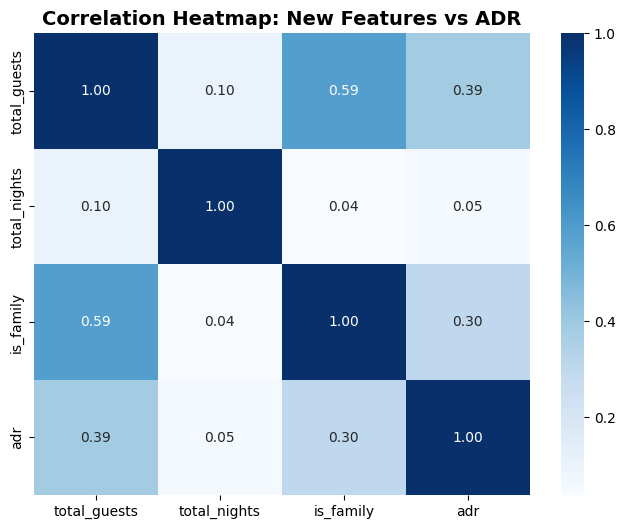

In [246]:
plt.figure(figsize=(8,6))
sns.heatmap(booking_encoded[['total_guests','total_nights','is_family','adr']].corr(),
            annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap: New Features vs ADR", fontsize=14, fontweight="bold")
plt.show()


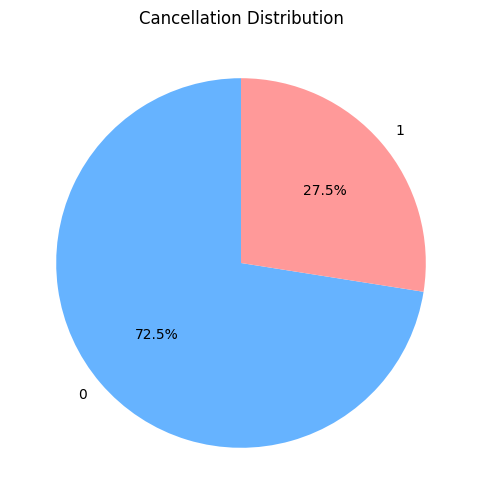

In [257]:
plt.figure(figsize=(6,6))
booking['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Cancellation Distribution")
plt.ylabel("")
plt.show()


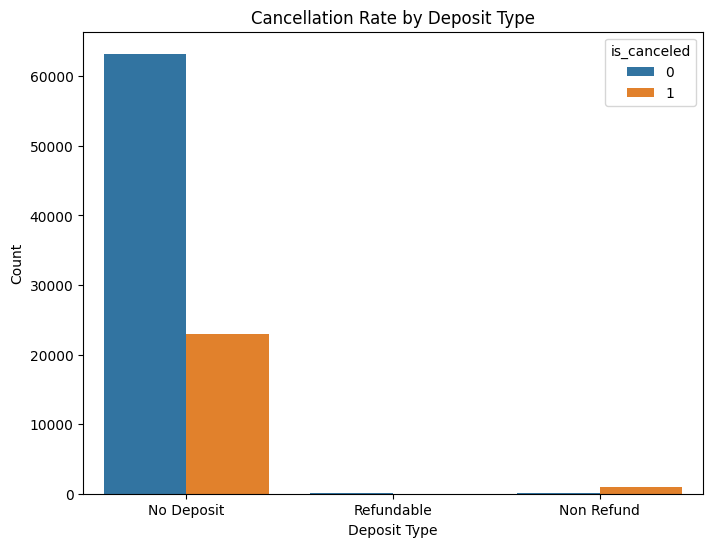

In [260]:
plt.figure(figsize=(8,6))
sns.countplot(x="deposit_type", hue="is_canceled", data=booking)
plt.title("Cancellation Rate by Deposit Type")
plt.ylabel("Count")
plt.xlabel("Deposit Type")
plt.show()


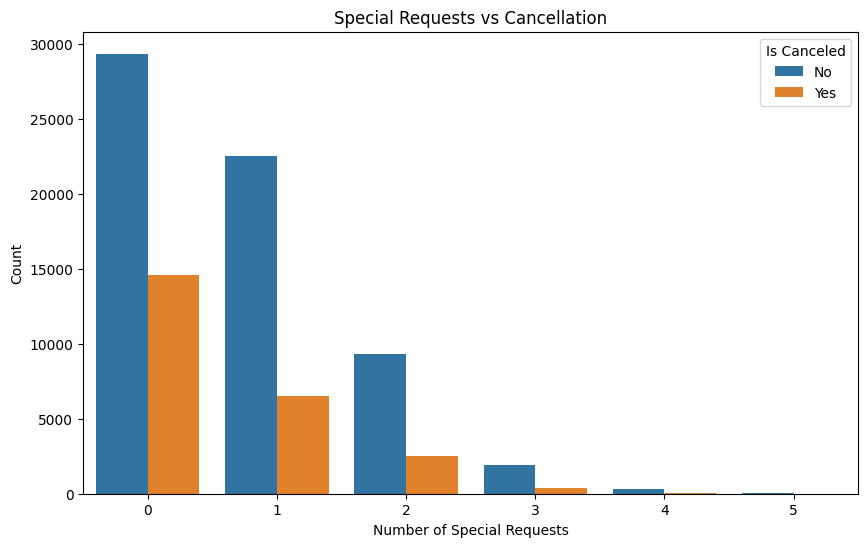

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="total_of_special_requests", hue="is_canceled", data=booking)
plt.title("Special Requests vs Cancellation")
plt.xlabel("Number of Special Requests")
plt.ylabel("Count")
plt.legend(title="Is Canceled", labels=["No","Yes"])
plt.show()

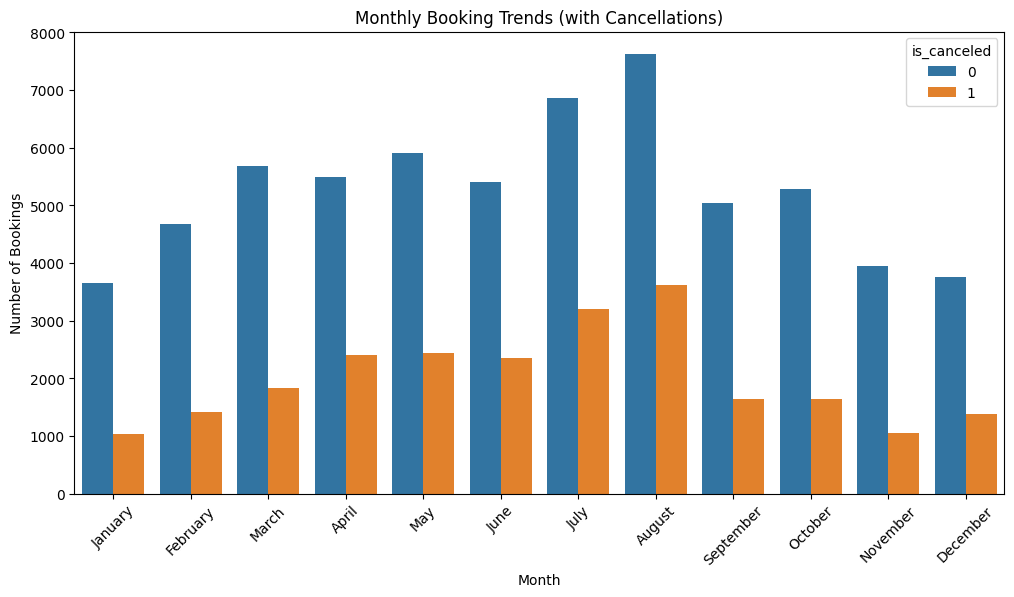

In [263]:
plt.figure(figsize=(12,6))
sns.countplot(x="arrival_date_month", hue="is_canceled", data=booking, order=[
    "January","February","March","April","May","June","July","August","September","October","November","December"])
plt.title("Monthly Booking Trends (with Cancellations)")
plt.ylabel("Number of Bookings")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


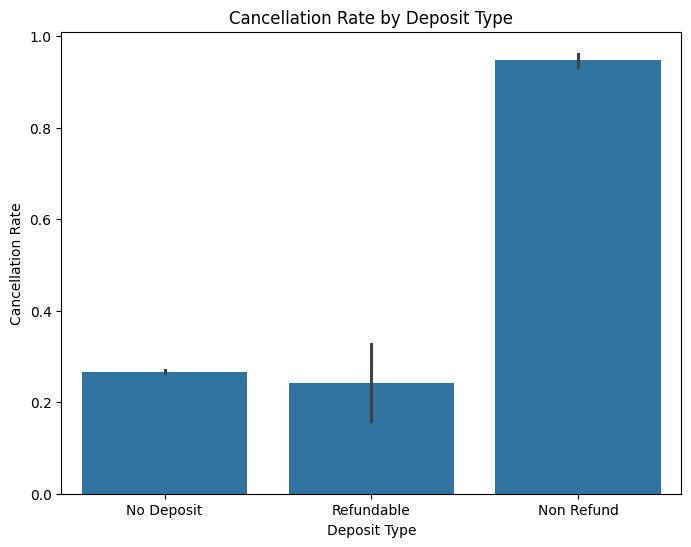

In [262]:
plt.figure(figsize=(8,6))
sns.barplot(x="deposit_type", y="is_canceled", data=booking)
plt.title("Cancellation Rate by Deposit Type")
plt.xlabel("Deposit Type")
plt.ylabel("Cancellation Rate")
plt.show()
